# **Analyzing the Population Growth Rate of Sumatra Island**

Analyzing the population data of Sumatra Island from 2018 to 2022 and creating visualizations of the data.

**Data from Badan Pusat Statistik (BPS) Indonesia**


# **Import Data**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
files.upload

In [26]:
file_path = "/content/Data Penduduk Menurut Provinsi, 2018.csv"
existing_df = pd.read_csv(file_path)
existing_df["Tahun"] = 2018
existing_df.to_csv("/content/Data Penduduk 2018.csv", index=False)

file_path = "/content/Data Penduduk Menurut Provinsi, 2019.csv"
existing_df = pd.read_csv(file_path)
existing_df["Tahun"] = 2019
existing_df.to_csv("/content/Data Penduduk 2019.csv", index=False)

file_path = "/content/Data Penduduk Menurut Provinsi, 2020.csv"
existing_df = pd.read_csv(file_path)
existing_df["Tahun"] = 2020
existing_df.to_csv("/content/Data Penduduk 2020.csv", index=False)

file_path = "/content/Data Penduduk Menurut Provinsi, 2021.csv"
existing_df = pd.read_csv(file_path)
existing_df["Tahun"] = 2021
existing_df.to_csv("/content/Data Penduduk 2021.csv", index=False)

file_path = "/content/Data Penduduk Menurut Provinsi, 2022.csv"
existing_df = pd.read_csv(file_path)
existing_df["Tahun"] = 2022
existing_df.to_csv("/content/Data Penduduk 2022.csv", index=False)

In [27]:
file_paths = ["/content/Data Penduduk 2018.csv", "/content/Data Penduduk 2019.csv",
              "/content/Data Penduduk 2020.csv", "/content/Data Penduduk 2021.csv",
              "/content/Data Penduduk 2022.csv"]
dfs = [pd.read_csv(file_path) for file_path in file_paths]
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.to_csv("Data Penduduk 2018-2022", index=False)

In [29]:
df = pd.read_csv('/content/Data Penduduk 2018-2022')
df.head(5)

,Provinsi,Jumlah Penduduk,Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi,Rasio Jenis Kelamin Penduduk,Tahun
0,Aceh,5281.3,1.96,1.99,91.0,99.8,2018
1,Sumatera Utara,14415.4,1.27,5.44,198.0,99.6,2018
2,Sumatera Barat,5382.1,1.27,2.03,128.0,99.3,2018
3,Riau,6814.9,2.54,2.57,78.0,105.3,2018
4,Jambi,3570.3,1.75,1.35,71.0,104.1,2018


In [30]:
df = pd.read_csv("/content/Data Penduduk 2018-2022")
Sumatera_provinces = ['Aceh', 'Sumatera Utara', 'Sumatera Barat',
                      'Riau', 'Jambi', 'Bengkulu', 'Kepulauan Riau', 'Sumatera Selatan', 'Lampung']
df_Pulau_Sumatera = df[df['Provinsi'].isin(Sumatera_provinces)]
df_Pulau_Sumatera.to_csv("Data_penduduk_pulau_sumatera.csv", index=False)

In [31]:
df = pd.read_csv('/content/Data_penduduk_pulau_sumatera.csv')
df.head()

,Provinsi,Jumlah Penduduk,Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi,Rasio Jenis Kelamin Penduduk,Tahun
0,Aceh,5281.3,1.96,1.99,91.0,99.8,2018
1,Sumatera Utara,14415.4,1.27,5.44,198.0,99.6,2018
2,Sumatera Barat,5382.1,1.27,2.03,128.0,99.3,2018
3,Riau,6814.9,2.54,2.57,78.0,105.3,2018
4,Jambi,3570.3,1.75,1.35,71.0,104.1,2018


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Provinsi                             45 non-null     object 
 1   Jumlah Penduduk                      45 non-null     float64
 2   Laju Pertumbuhan Penduduk per Tahun  45 non-null     float64
 3   Persentase Penduduk                  45 non-null     float64
 4   Kepadatan Penduduk per km persegi    45 non-null     float64
 5   Rasio Jenis Kelamin Penduduk         45 non-null     float64
 6   Tahun                                45 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.6+ KB


In [33]:
print(df.isnull().sum())

Provinsi                               0
Jumlah Penduduk                        0
Laju Pertumbuhan Penduduk per Tahun    0
Persentase Penduduk                    0
Kepadatan Penduduk per km persegi      0
Rasio Jenis Kelamin Penduduk           0
Tahun                                  0
dtype: int64


In [34]:
df.nunique()

Provinsi                                9
Jumlah Penduduk                        45
Laju Pertumbuhan Penduduk per Tahun    38
Persentase Penduduk                    29
Kepadatan Penduduk per km persegi      34
Rasio Jenis Kelamin Penduduk           25
Tahun                                   5
dtype: int64

In [41]:
le = LabelEncoder()
lstforle = ['Provinsi']
for i in lstforle :
    df[i] = le.fit_transform(df[i])
    print(i,' : ',df[i].unique(),' = ',
          le.inverse_transform(df[i].unique()))

Provinsi  :  [0 8 6 5 2 7 1 4 3]  =  ['Aceh' 'Sumatera Utara' 'Sumatera Barat' 'Riau' 'Jambi'
 'Sumatera Selatan' 'Bengkulu' 'Lampung' 'Kepulauan Riau']


# **EDA**

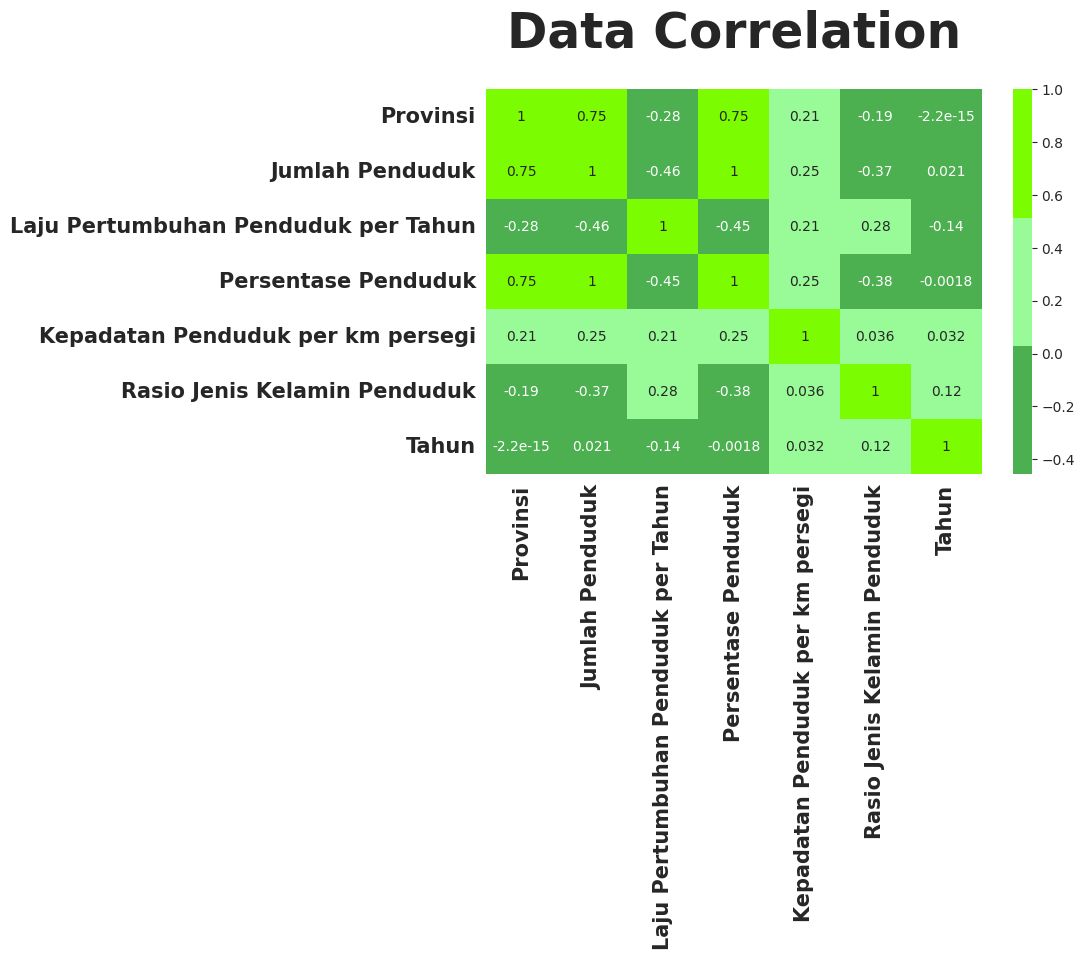

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(),
            cmap = ['#4CAF50','#98FB98', '#7CFC00'], annot=True)
plt.title("Data Correlation", weight="bold", fontsize=35, pad=30)
plt.xticks(weight="bold", fontsize=15)
plt.yticks(weight="bold", fontsize=15);

* The population size has a fairly strong relationship with Population Density per square kilometer.
* The population size has a strong relationship with the percentage of the population.
* The relationship between the year and the population size is very weak, but there is a tendency that as time passes (years increase), the population size also slightly increases.
* There is a tendency for the growth rate to decrease slightly over time, but the relationship is not very strong.

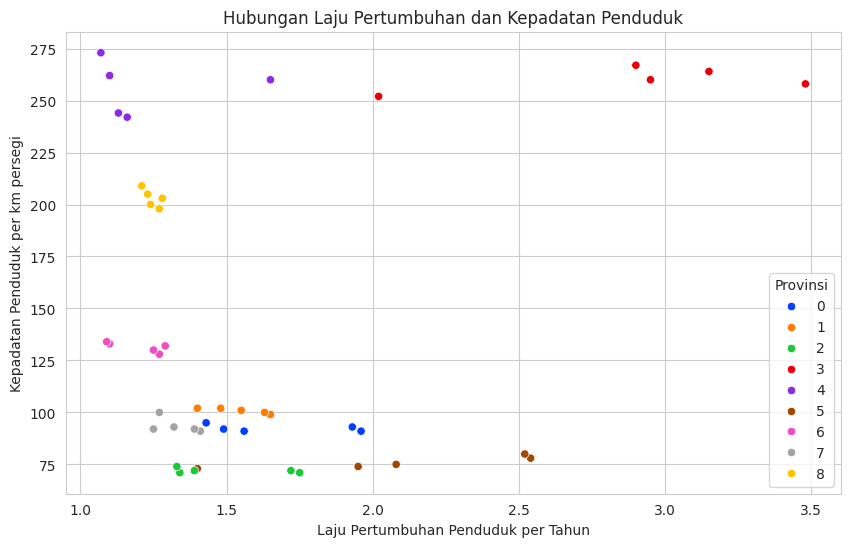

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Laju Pertumbuhan Penduduk per Tahun', y='Kepadatan Penduduk per km persegi', data=df, hue='Provinsi', palette='bright')
plt.title('Hubungan Laju Pertumbuhan dan Kepadatan Penduduk')
plt.xlabel('Laju Pertumbuhan Penduduk per Tahun')
plt.ylabel('Kepadatan Penduduk per km persegi')
plt.show()

*   Provinces with the lowest population density also have low population growth rates on average.
*   Riau Islands and Riau have high population growth rates.
*   West Sumatra has moderate population density, but its population growth rate is low.
*   Lampung has high population density, yet its population growth rate is low.

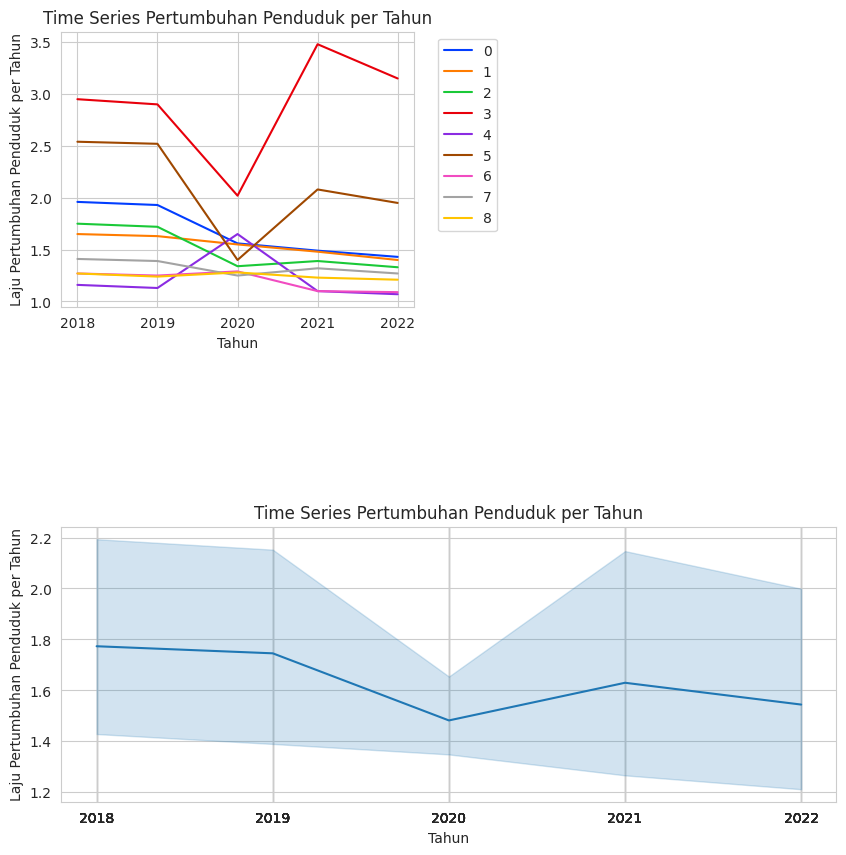

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,10))
plt.subplots_adjust(hspace=0.8)

plt.subplot(2, 2, 1)
sns.lineplot(x='Tahun', y='Laju Pertumbuhan Penduduk per Tahun', hue='Provinsi', data=df, palette='bright')
plt.title('Time Series Pertumbuhan Penduduk per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Laju Pertumbuhan Penduduk per Tahun')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(2, 1, 2)
sns.lineplot(x='Tahun', y='Laju Pertumbuhan Penduduk per Tahun', data=df)
plt.title('Time Series Pertumbuhan Penduduk per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Laju Pertumbuhan Penduduk per Tahun')
plt.xticks(df['Tahun'])
plt.show()

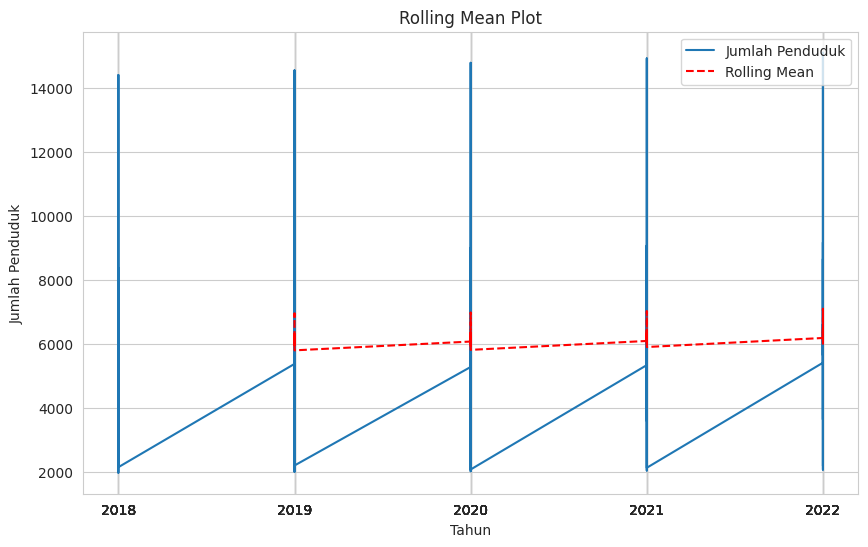

In [45]:
df['Rolling_Mean'] = df['Jumlah Penduduk'].rolling(window=12).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['Tahun'], df['Jumlah Penduduk'], label='Jumlah Penduduk')
plt.plot(df['Tahun'], df['Rolling_Mean'], label='Rolling Mean', linestyle='--', color='red')
plt.title('Rolling Mean Plot')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penduduk')
plt.xticks(df['Tahun'])
plt.legend()
plt.show()

* In 2020, the average population growth rate experienced a drastic decrease.
* In 2021, the average population growth rate experienced an increase.
* In 2022, the population growth rate experienced a decrease, although not as drastic.
* The average population growth rate from 2018 to 2022 experienced a decline.
* The population size increased from 2018 to 2022.

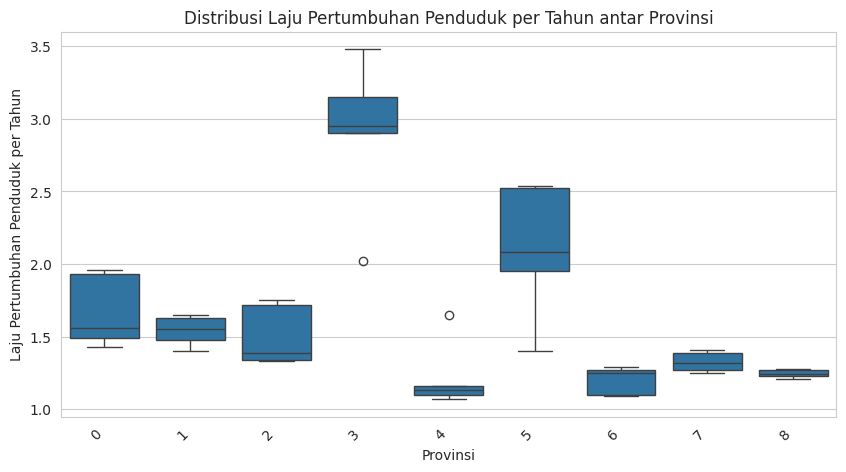

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Provinsi', y='Laju Pertumbuhan Penduduk per Tahun', data=df)
plt.title('Distribusi Laju Pertumbuhan Penduduk per Tahun antar Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Laju Pertumbuhan Penduduk per Tahun')
plt.xticks(rotation=45, ha='right')
plt.show()

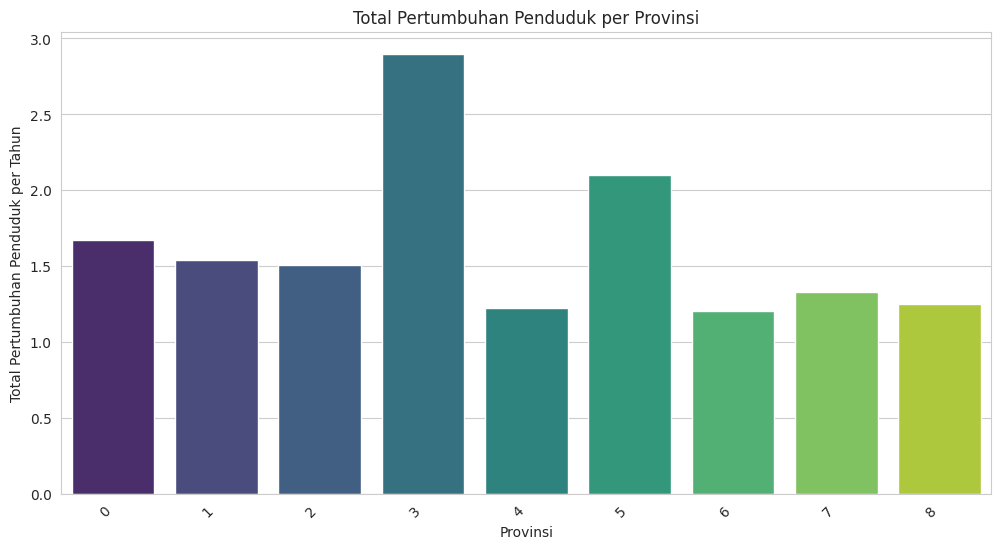

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Provinsi', y='Laju Pertumbuhan Penduduk per Tahun', data=df, ci=None, palette='viridis')
plt.title('Total Pertumbuhan Penduduk per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Total Pertumbuhan Penduduk per Tahun')
plt.xticks(rotation=45, ha='right')
plt.show()

*   The province with the highest population growth rate is Riau Islands.
*   The province with the lowest population growth rate is West Sumatra.

# **CONCLUSION**

The average population growth rate of Sumatra Island from 2018 to 2022 has experienced a decline. Therefore, it can be concluded that the estimated population growth rate for the following year will also experience a decline. However, it is necessary to further investigate some other factors.